In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.47'

## Lets get densities from homog Ts from the heating-cooling stage

In [2]:
# Using Sterner and Pitzer
SP1994_Th=pf.calculate_Pressure_Sterner_Pitzer_1994_test(T_K=1400, calc_type='T_h',
T_h=-27, phase='Liq')
SP1994_Th

,T_h,T_K,Liq_density_gcm3,Gas_density_gcm3,P_MPa
0,-27,1400,1.06295,0.041053,934.041771


In [3]:
# using Span and Wanger 
SW1996=pf.ind_density_homog_T_CO2(T_C=-27)
SW1996

,Liq_gcm3,Gas_gcm3,T_C
0,1.062912,0.041052,-27


## Compare EOS for gas cell
![image.png](attachment:a01dc1f0-58e8-4a5a-8a54-157dbc05dda0.png)

## Calculating density for a temp of 37 celcius, and pressures between 0 and 35 MPa

In [10]:
import CoolProp.CoolProp as cp
P=np.linspace(0, 35, 100)
T1=273.15+37

CritT=pf.calculate_Density_Sterner_Pitzer_1994_loop(T_K=T1, target_pressure=P)
SW1996_CritT=cp.PropsSI('D', 'P', P*10**6, 'T',T1 , 'CO2')/1000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


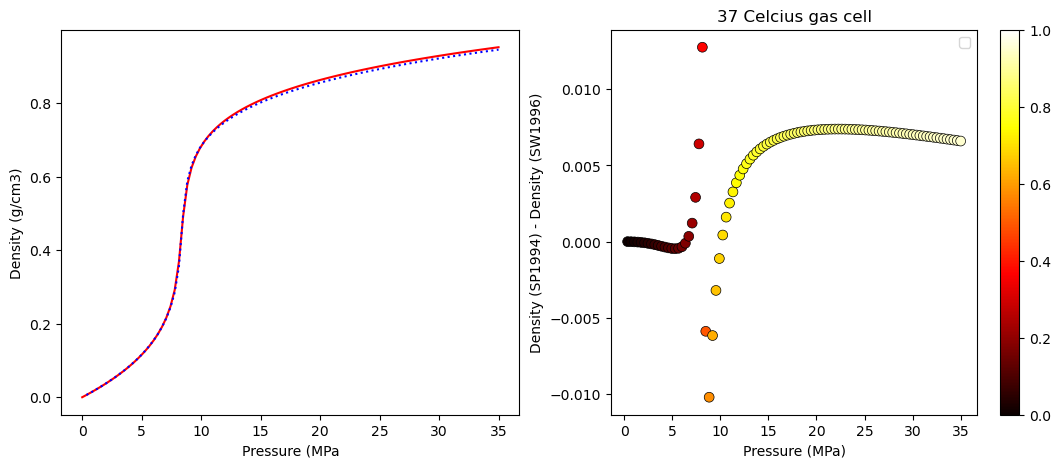

In [35]:

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,5))
#ax1.plot(P, CritT-SW1996_CritT, '.r')
p=ax1.scatter(P,
            CritT-SW1996_CritT, marker='o', s=50, edgecolors='k', linewidths=0.5,
            c=CritT, cmap='hot',
vmin = 0, vmax = 1)
ax0.plot(P, CritT, '-r', label='SP1994')
ax0.plot(P, SW1996_CritT, ':b', label='SW96')
fig.colorbar(p, ax=ax1)
ax0.set_xlabel('Pressure (MPa')
ax0.set_ylabel('Density (g/cm3)')
ax1.set_title('37 Celcius gas cell')
ax1.set_xlabel('Pressure (MPa)')
ax1.set_ylabel('Density (SP1994) - Density (SW1996)')
ax1.legend()

## Plots of P-T in crust. 
- Choose 2 densities, 1.1 g/cm3 and 0.1 g/cm3 (0.1 g/cm3)
- Run at 273.15 K to 2000 K (so 0 celcius to 1700 ish celcius)

In [30]:
T_K_array=np.linspace(273.15, 2000)
rho1=1.1
rho2=0.1
rho3=0.5
df_SP94_11=pf.calc_pressure_SP1994(T_K=T_K_array, density_gcm3=rho1)
df_SP94_01=pf.calc_pressure_SP1994(T_K=T_K_array, density_gcm3=rho2)
df_SP94_03=pf.calc_pressure_SP1994(T_K=T_K_array, density_gcm3=rho3)

Pressure_ar_11=cp.PropsSI('P', 'D', rho1*1000, 'T', T_K_array, 'CO2')/10**6
Pressure_ar_01=cp.PropsSI('P', 'D', rho2*1000, 'T', T_K_array, 'CO2')/10**6
Pressure_ar_03=cp.PropsSI('P', 'D', rho3*1000, 'T', T_K_array, 'CO2')/10**6


(0.0, 200.0)

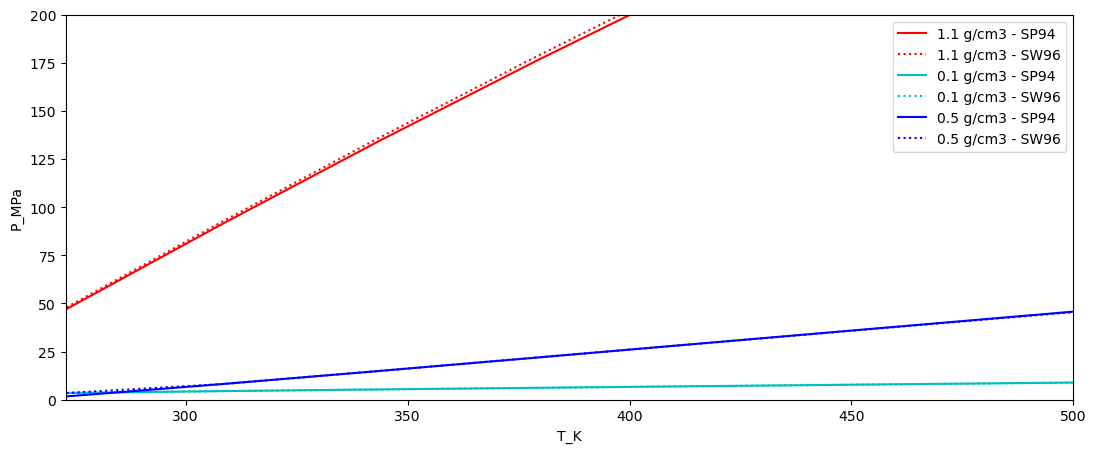

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=(13,5))
ax1.plot(T_K_array, df_SP94_11, '-r', label='1.1 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_11, ':r', label='1.1 g/cm3 - SW96');

ax1.plot(T_K_array, df_SP94_01, '-c', label='0.1 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_01, ':c', label='0.1 g/cm3 - SW96');

ax1.plot(T_K_array, df_SP94_03, '-b', label='0.5 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_03, ':b', label='0.5 g/cm3 - SW96');

ax1.set_xlabel('T_K')
ax1.set_ylabel('P_MPa')
ax1.legend()
ax1.set_xlim([273, 500])
ax1.set_ylim([0, 200])

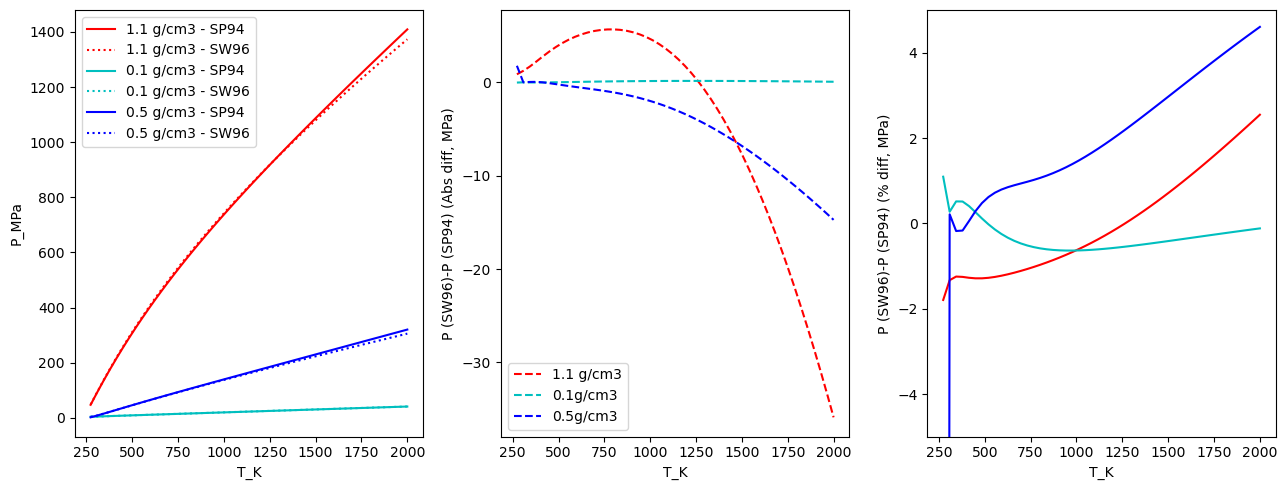

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
ax1.plot(T_K_array, df_SP94_11, '-r', label='1.1 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_11, ':r', label='1.1 g/cm3 - SW96');

ax1.plot(T_K_array, df_SP94_01, '-c', label='0.1 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_01, ':c', label='0.1 g/cm3 - SW96');

ax1.plot(T_K_array, df_SP94_03, '-b', label='0.5 g/cm3 - SP94');
ax1.plot(T_K_array, Pressure_ar_03, ':b', label='0.5 g/cm3 - SW96');

ax1.set_xlabel('T_K')
ax1.set_ylabel('P_MPa')
ax1.legend()

ax2.plot(T_K_array, Pressure_ar_11-df_SP94_11, '--r', label='1.1 g/cm3');
ax2.plot(T_K_array, Pressure_ar_01-df_SP94_01, '--c', label='0.1g/cm3');
ax2.plot(T_K_array, Pressure_ar_03-df_SP94_03, '--b', label='0.5g/cm3');

ax2.set_xlabel('T_K')
ax2.set_ylabel('P (SW96)-P (SP94) (Abs diff, MPa)')
ax2.legend()

ax3.plot(T_K_array, 100-100*Pressure_ar_11/df_SP94_11, '-r', label='1.1 g/cm3');
ax3.plot(T_K_array, 100-100*Pressure_ar_01/df_SP94_01, '-c', label='0.1g/cm3');
ax3.plot(T_K_array, 100-100*Pressure_ar_03/df_SP94_03, '-b', label='0.5g/cm3');
ax3.set_ylim([-5, 5])
ax3.set_xlabel('T_K')
ax3.set_ylabel('P (SW96)-P (SP94) (% diff, MPa)')
ax2.legend()
fig.tight_layout()

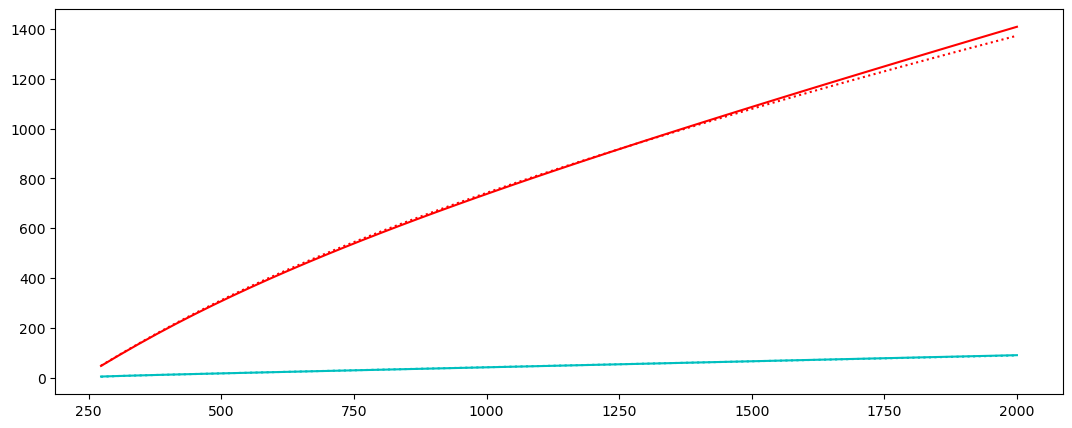

## Fugacity - how non ideal is it?
-Fugacity is a measure of the departure of a real fluid from ideal behavior. In an ideal fluid, the fugacity is equal to its pressure. In a real fluid, the fugacity can be different from the pressure due to deviations from ideal behavior, such as attractive and repulsive intermolecular forces. At high pressure, the intermolecular forces become more important, leading to a larger deviation from ideal behavior and a fugacity that is not equal to 1.

In [34]:
# CoolPropDbl 
help(cp.calc_fugacity())

AttributeError: module 'CoolProp.CoolProp' has no attribute 'calc_fugacity'

In [ ]:
cp.PropsSI('P', 'D', rho2*1000, 'T', T_K_array, 'CO2')/10**6